In [7]:
import pandas as pd
from newspaper import Article
import nltk
import ast
import requests
import swifter
from tqdm.auto import tqdm
tqdm.pandas()

In [8]:
df = pd.read_csv('NepaliTimes/tweets.csv', usecols=['id', 'created_at', 'tweet', 'urls', 'likes_count'], parse_dates=['created_at'])

In [9]:
list(df)

['id', 'created_at', 'tweet', 'urls', 'likes_count']

In [10]:
df.shape

(6394, 5)

In [11]:
df.head()

,id,created_at,tweet,urls,likes_count
0,1376906056824016911,2021-03-30 20:21:00+05:45,"Neglected for decades, #Nepal's Far-West is fi...",['https://www.nepalitimes.com/banner/the-sun-r...,26
1,1376875102919258113,2021-03-30 18:18:00+05:45,How is it possible for women to feel safe and ...,['https://www.nepalitimes.com/opinion/educatin...,14
2,1376843645316304902,2021-03-30 16:13:00+05:45,"“Every goal requires teamwork, positive thinki...",['https://www.nepalitimes.com/latest/female-fo...,30
3,1376810929963196416,2021-03-30 14:03:00+05:45,"#editorial In a remote part of #Nepal, local e...",['https://www.nepalitimes.com/editorial/devolu...,10
4,1376782744001253378,2021-03-30 12:11:00+05:45,Nepali migrant workers have been waiting for m...,['https://www.nepalitimes.com/here-now/delayed...,8


In [12]:
df.tail()

,id,created_at,tweet,urls,likes_count
6389,947788241394130944,2018-01-01 17:00:00+05:45,Happy 2018! #MISSMOTIVATION With the new day c...,['http://bit.ly/2Cl4DAN'],8
6390,947757617299914752,2018-01-01 14:58:19+05:45,"The air was thick with laughter in Tundikhel, ...",['http://bit.ly/2zVQDaE'],14
6391,947719271169138688,2018-01-01 12:25:56+05:45,While thousands of #Nepalis have made it good ...,['http://bit.ly/2zKNpGT'],8
6392,947704592594169859,2018-01-01 11:27:37+05:45,Weather Update Westerly front approaching. 80%...,[],8
6393,947676079392567296,2018-01-01 09:34:18+05:45,#POLL Will we have more political stability in...,[],3


In [13]:
df.resample('Y', on='created_at')[['id']].count()

,id
created_at,
2018-12-31 00:00:00+05:45,1657
2019-12-31 00:00:00+05:45,1779
2020-12-31 00:00:00+05:45,2364
2021-12-31 00:00:00+05:45,594


<AxesSubplot:xlabel='created_at'>

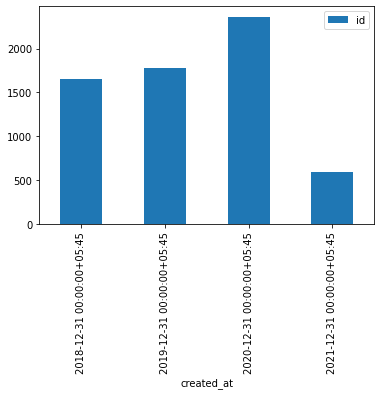

In [14]:
df.resample('Y', on='created_at')[['id']].count().plot(kind='bar')

### Remove tweets without a URL

In [18]:
df=df[df.urls!="[]"]

### Remove secondary link and convert all links to redirect links

In [19]:
def primary_url(urls):
    url = ast.literal_eval(urls)[0]
    try:
        r = requests.get(url) 
        return (r.url)
    except:
        return 404

In [20]:
df['urls'] = df.urls.progress_apply(primary_url)

In [21]:
df.to_csv('NepaliTimes.csv', index=False)

In [22]:
df

,id,created_at,tweet,urls,likes_count
0,1376906056824016911,2021-03-30 20:21:00+05:45,"Neglected for decades, #Nepal's Far-West is fi...",https://www.nepalitimes.com/banner/the-sun-ris...,26
1,1376875102919258113,2021-03-30 18:18:00+05:45,How is it possible for women to feel safe and ...,https://www.nepalitimes.com/opinion/educating-...,14
2,1376843645316304902,2021-03-30 16:13:00+05:45,"“Every goal requires teamwork, positive thinki...",https://www.nepalitimes.com/latest/female-foot...,30
3,1376810929963196416,2021-03-30 14:03:00+05:45,"#editorial In a remote part of #Nepal, local e...",https://www.nepalitimes.com/editorial/devoluti...,10
4,1376782744001253378,2021-03-30 12:11:00+05:45,Nepali migrant workers have been waiting for m...,https://www.nepalitimes.com/here-now/delayed-d...,8
...,...,...,...,...,...
6387,948090231043117056,2018-01-02 13:00:00+05:45,EDITORIAL 2018 should be when a new federal go...,http://archive.nepalitimes.com/article/editori...,12
6388,948056690443689986,2018-01-02 10:46:43+05:45,The story of specialty coffee starts at the #f...,http://archive.nepalitimes.com/article/Nepali-...,9
6389,947788241394130944,2018-01-01 17:00:00+05:45,Happy 2018! #MISSMOTIVATION With the new day c...,http://archive.nepalitimes.com/regular-columns...,8
6390,947757617299914752,2018-01-01 14:58:19+05:45,"The air was thick with laughter in Tundikhel, ...",http://archive.nepalitimes.com/blogs/mycity/20...,14


In [26]:
df.drop_duplicates(['urls'], keep="last")

,id,created_at,tweet,urls,likes_count
2,1376843645316304902,2021-03-30 16:13:00+05:45,"“Every goal requires teamwork, positive thinki...",https://www.nepalitimes.com/latest/female-foot...,30
4,1376782744001253378,2021-03-30 12:11:00+05:45,Nepali migrant workers have been waiting for m...,https://www.nepalitimes.com/here-now/delayed-d...,8
5,1376750865264996354,2021-03-30 10:04:19+05:45,Nepal relaxes entry for tourists No quarantin...,https://www.nepalitimes.com/latest/nepal-relax...,25
7,1376525443520552960,2021-03-29 19:08:34+05:45,Nepali Times interviewed UML party spokesperso...,https://www.nepalitimes.com/latest/unity-with-...,53
10,1376434290464976896,2021-03-29 13:06:22+05:45,#Nepal’s civil rights activists call on the go...,https://www.nepalitimes.com/banner/nepalis-sho...,41
...,...,...,...,...,...
6387,948090231043117056,2018-01-02 13:00:00+05:45,EDITORIAL 2018 should be when a new federal go...,http://archive.nepalitimes.com/article/editori...,12
6388,948056690443689986,2018-01-02 10:46:43+05:45,The story of specialty coffee starts at the #f...,http://archive.nepalitimes.com/article/Nepali-...,9
6389,947788241394130944,2018-01-01 17:00:00+05:45,Happy 2018! #MISSMOTIVATION With the new day c...,http://archive.nepalitimes.com/regular-columns...,8
6390,947757617299914752,2018-01-01 14:58:19+05:45,"The air was thick with laughter in Tundikhel, ...",http://archive.nepalitimes.com/blogs/mycity/20...,14


In [27]:
df.to_csv('NepaliTimes.csv', index=False)

In [28]:
df

,id,created_at,tweet,urls,likes_count
0,1376906056824016911,2021-03-30 20:21:00+05:45,"Neglected for decades, #Nepal's Far-West is fi...",https://www.nepalitimes.com/banner/the-sun-ris...,26
1,1376875102919258113,2021-03-30 18:18:00+05:45,How is it possible for women to feel safe and ...,https://www.nepalitimes.com/opinion/educating-...,14
2,1376843645316304902,2021-03-30 16:13:00+05:45,"“Every goal requires teamwork, positive thinki...",https://www.nepalitimes.com/latest/female-foot...,30
3,1376810929963196416,2021-03-30 14:03:00+05:45,"#editorial In a remote part of #Nepal, local e...",https://www.nepalitimes.com/editorial/devoluti...,10
4,1376782744001253378,2021-03-30 12:11:00+05:45,Nepali migrant workers have been waiting for m...,https://www.nepalitimes.com/here-now/delayed-d...,8
...,...,...,...,...,...
6387,948090231043117056,2018-01-02 13:00:00+05:45,EDITORIAL 2018 should be when a new federal go...,http://archive.nepalitimes.com/article/editori...,12
6388,948056690443689986,2018-01-02 10:46:43+05:45,The story of specialty coffee starts at the #f...,http://archive.nepalitimes.com/article/Nepali-...,9
6389,947788241394130944,2018-01-01 17:00:00+05:45,Happy 2018! #MISSMOTIVATION With the new day c...,http://archive.nepalitimes.com/regular-columns...,8
6390,947757617299914752,2018-01-01 14:58:19+05:45,"The air was thick with laughter in Tundikhel, ...",http://archive.nepalitimes.com/blogs/mycity/20...,14
